In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# estandar para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style='whitegrid', palette='deep', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [3]:
# visualizacion de todas las colummnas en un dataframe
pd.set_option('display.max_columns', None)

In [4]:
# reproducibilidad
np.random.seed(42) 

DATASET CON DATOS ALEATORIOS

In [5]:
n = 1000
# dataframe a partir de ventas aleatorias
ventas_df = pd.DataFrame({
    'fecha': pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'id_producto': np.random.randint(1000, 2000, size=n),
    'categoria': np.random.choice(['Electrónica', 'Ropa', 'Alimentos', 'Deportes'], size=n),
    'precio': np.random.normal(100, 30, size=n).round(2),
    'cantidad': np.random.randint(1, 10, size=n),
    'id_cliente': np.random.randint(5000, 6000, size=n),
    'edad_cliente': np.random.normal(35, 12, size=n).round().astype(int),
    'genero_cliente': np.random.choice(['M', 'F', 'Otro'], p=[0.48,0.48,0.04] ,size=n),
    'ciudad': np.random.choice(['Madrid', 'Barcelona', 'Valencia', 'Murcia', 'Málaga'], size=n),
    'metodo_pago': np.random.choice(['Tarjeta', 'Paypal', 'Bizum', 'Efectivo'], size=n),
    'valoracion': np.random.randint(1,6, size=n),
    'tiempo_entrega': np.random.normal(5,2, size=n).round().astype(int)
}) 

In [6]:
# cargar valores nulos para simular datos faltantes
for col in ['edad_cliente', 'valoracion', 'tiempo_entrega']:
    mask = np.random.random(n) < 0.05  # 10% de datos faltantes
    ventas_df[col] = np.where(mask, np.nan, ventas_df[col])
    

In [7]:
# columnas calculadas
ventas_df['total_ventas'] = (ventas_df['precio'] * ventas_df['cantidad']).round(2)
ventas_df['mes'] = ventas_df['fecha'].dt.month_name()
ventas_df['dia_semana'] = ventas_df['fecha'].dt.day_name()
ventas_df['fin_de_semana'] = ventas_df['fecha'].dt.dayofweek >= 5 


In [8]:
ventas_df.head(10)

,fecha,id_producto,categoria,precio,cantidad,id_cliente,edad_cliente,genero_cliente,ciudad,metodo_pago,valoracion,tiempo_entrega,total_ventas,mes,dia_semana,fin_de_semana
0,2023-01-01,1102,Electrónica,112.89,6,5753,29.0,F,Málaga,Bizum,5.0,7.0,677.34,January,Sunday,True
1,2023-01-02,1435,Electrónica,106.23,9,5120,39.0,M,Valencia,Paypal,5.0,6.0,956.07,January,Monday,False
2,2023-01-03,1860,Alimentos,108.15,9,5384,26.0,M,Barcelona,Tarjeta,3.0,5.0,973.35,January,Tuesday,False
3,2023-01-04,1270,Deportes,61.70,8,5613,44.0,F,Valencia,Paypal,2.0,2.0,493.60,January,Wednesday,False
4,2023-01-05,1106,Electrónica,67.57,5,5037,NaN,F,Murcia,Tarjeta,4.0,4.0,337.85,January,Thursday,False
5,2023-01-06,1071,Ropa,131.59,1,5340,57.0,M,Murcia,Paypal,2.0,8.0,131.59,January,Friday,False
6,2023-01-07,1700,Electrónica,98.81,9,5924,33.0,Otro,Murcia,Paypal,5.0,6.0,889.29,January,Saturday,True
7,2023-01-08,1020,Ropa,120.45,1,5644,NaN,F,Málaga,Efectivo,2.0,4.0,120.45,January,Sunday,True
8,2023-01-09,1614,Deportes,100.85,8,5713,36.0,F,Madrid,Efectivo,4.0,6.0,806.80,January,Monday,False
9,2023-01-10,1121,Alimentos,100.89,5,5859,51.0,M,Valencia,Tarjeta,2.0,NaN,504.45,January,Tuesday,False


EXPLORACIÓN DE DATOS

In [9]:
# Informacion general del dataframe
print('Información del Dataframe:\n')
ventas_df.info()

Información del Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   fecha           1000 non-null   datetime64[ns]
 1   id_producto     1000 non-null   int32         
 2   categoria       1000 non-null   object        
 3   precio          1000 non-null   float64       
 4   cantidad        1000 non-null   int32         
 5   id_cliente      1000 non-null   int32         
 6   edad_cliente    944 non-null    float64       
 7   genero_cliente  1000 non-null   object        
 8   ciudad          1000 non-null   object        
 9   metodo_pago     1000 non-null   object        
 10  valoracion      938 non-null    float64       
 11  tiempo_entrega  950 non-null    float64       
 12  total_ventas    1000 non-null   float64       
 13  mes             1000 non-null   object        
 14  dia_semana      1000 non-null

In [10]:
# Estadística descriptiva básica
print('\nEstadística descriptiva básica:\n')
ventas_df.describe()


Estadística descriptiva básica:



,fecha,id_producto,precio,cantidad,id_cliente,edad_cliente,valoracion,tiempo_entrega,total_ventas
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,944.000000,938.000000,950.000000,1000.000000
mean,2024-05-14 12:00:00,1503.929000,102.845430,4.946000,5509.353000,34.864407,2.947761,4.997895,510.053470
min,2023-01-01 00:00:00,1000.000000,12.360000,1.000000,5000.000000,-1.000000,1.000000,-2.000000,13.830000
25%,2023-09-07 18:00:00,1242.750000,82.875000,3.000000,5254.750000,26.000000,2.000000,4.000000,257.635000
50%,2024-05-14 12:00:00,1505.000000,102.330000,5.000000,5507.500000,35.000000,3.000000,5.000000,451.265000
75%,2025-01-19 06:00:00,1757.250000,122.185000,7.000000,5761.250000,43.000000,4.000000,6.000000,725.222500
max,2025-09-26 00:00:00,1998.000000,195.790000,9.000000,5998.000000,74.000000,5.000000,12.000000,1558.710000
std,NaN,289.998108,29.710899,2.608426,289.702527,12.233529,1.450146,1.980409,316.517375


In [11]:
# Valores nulos
print('\nValores nulos:\n')
print(ventas_df.isnull().sum())


Valores nulos:

fecha              0
id_producto        0
categoria          0
precio             0
cantidad           0
id_cliente         0
edad_cliente      56
genero_cliente     0
ciudad             0
metodo_pago        0
valoracion        62
tiempo_entrega    50
total_ventas       0
mes                0
dia_semana         0
fin_de_semana      0
dtype: int64


ANÁLISIS UNIVARIANTE

In [12]:
# variables numéricas
columnas_numerica = ventas_df.select_dtypes(include=['int64','float64']).columns.tolist()
#excluir columnas que no son relevantes para el análisis
columnas_numerica = [col for col in columnas_numerica if col not in ['id_producto','id_cliente']] 

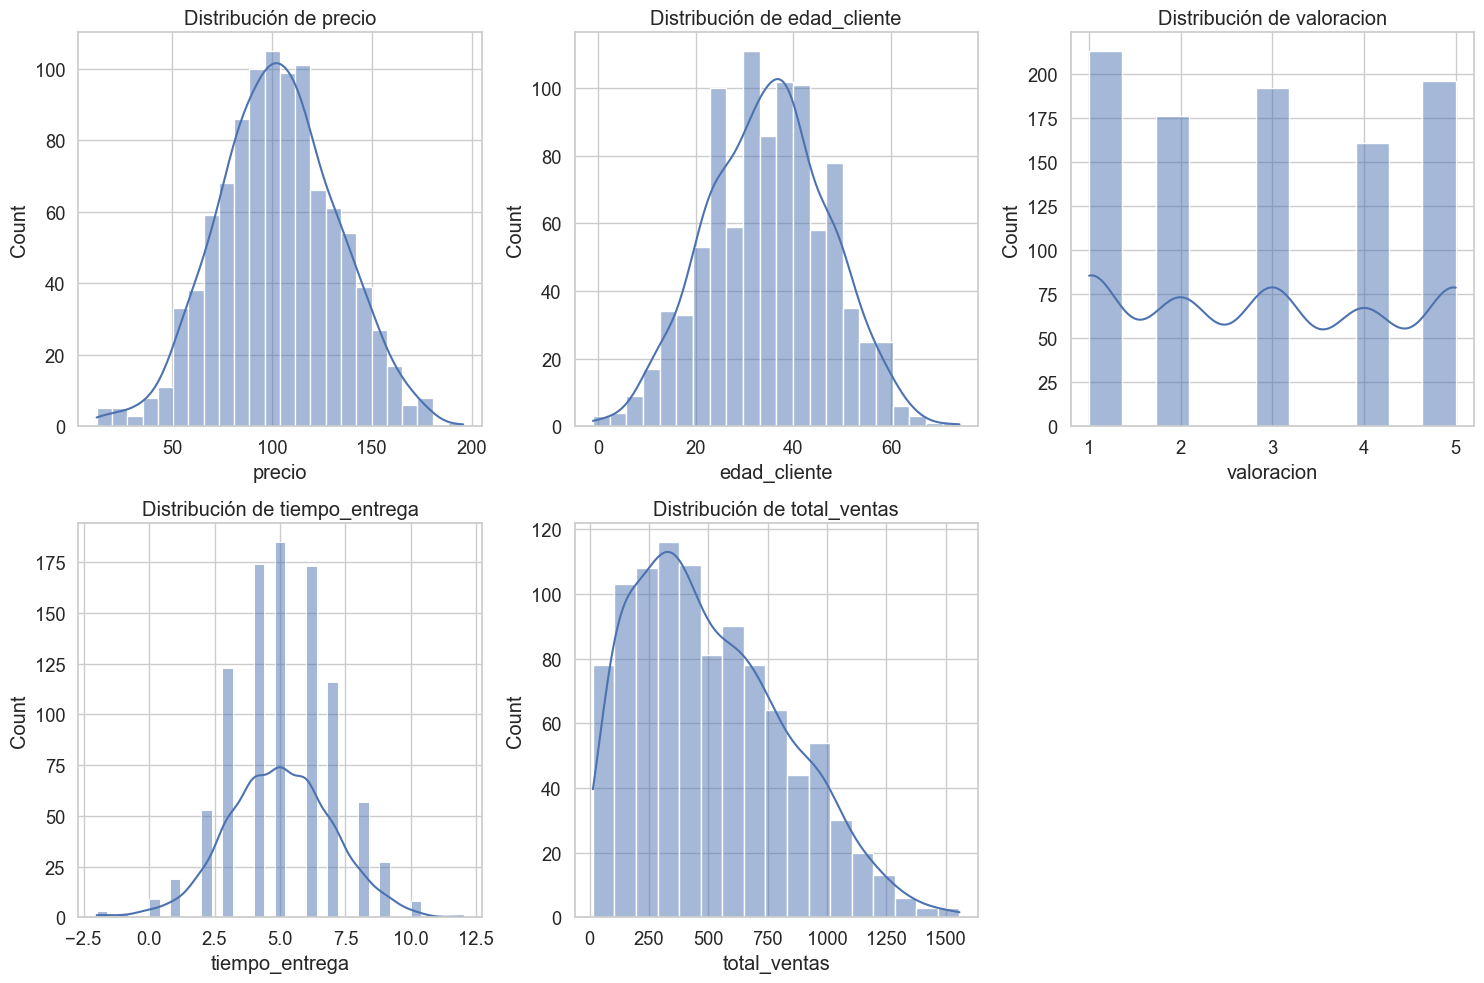

In [13]:
# creacion de histogramas para variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(columnas_numerica, 1):
    plt.subplot(2, 3, i)
    sns.histplot(ventas_df[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

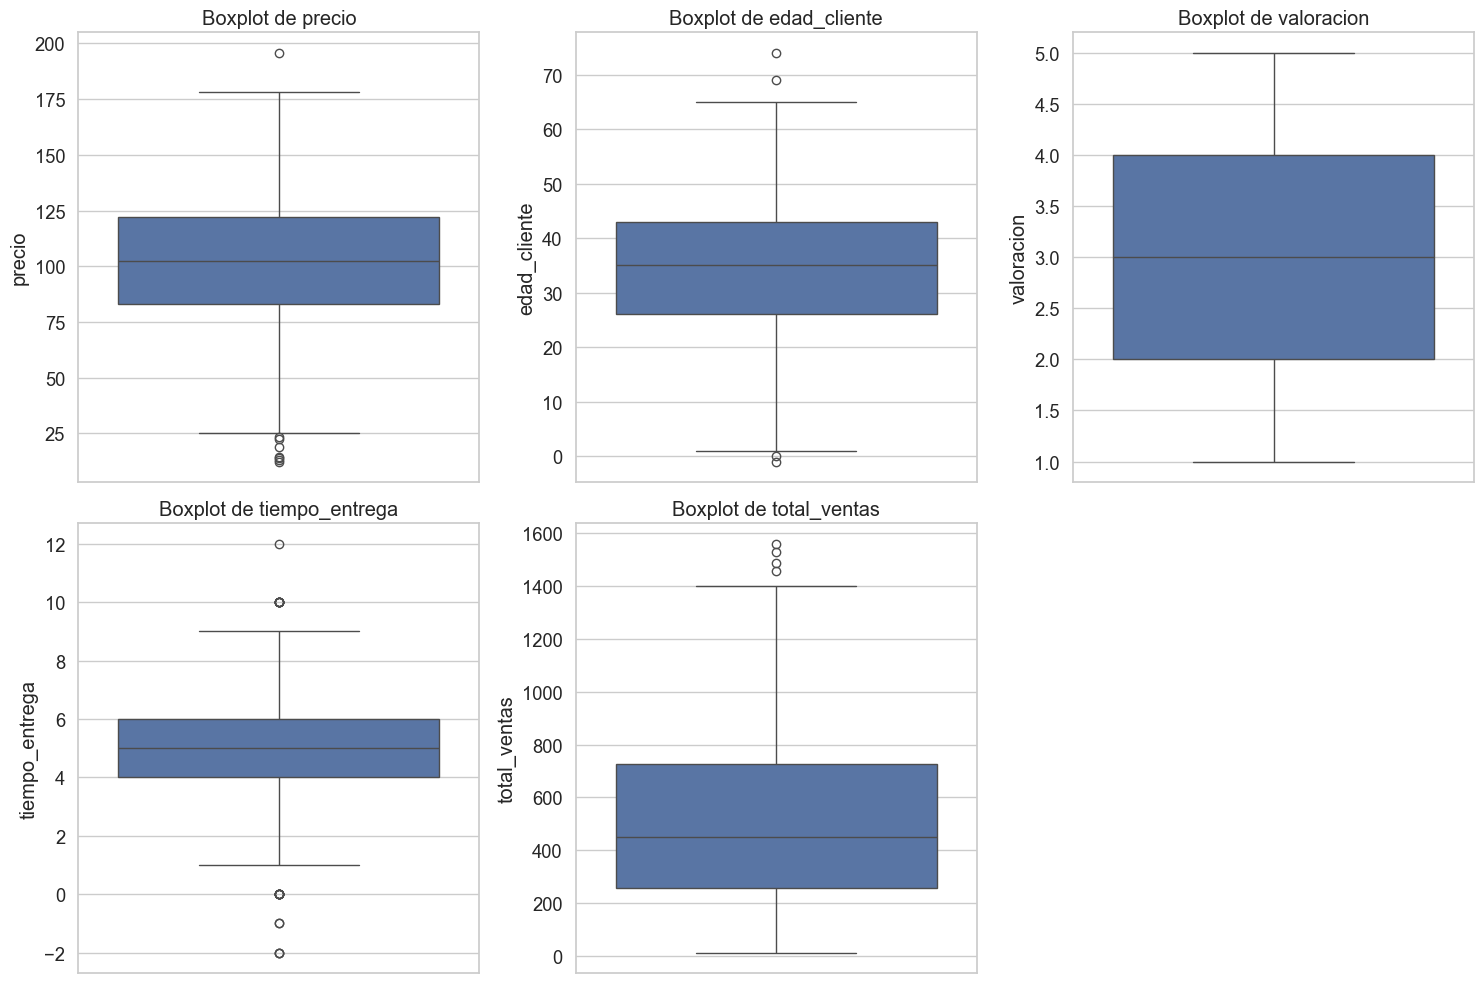

In [14]:
# Boxplots para dectectar outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(columnas_numerica, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=ventas_df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
plt.show

In [15]:
# Estadistica descriptiva por categoria
for col in columnas_numerica:
    print(f'\nEstadística descriptiva de {col} por categoria:\n')
    stats = ventas_df[col].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).round(2)
    print(stats)


Estadística descriptiva de precio por categoria:

count    1000.00
mean      102.85
std        29.71
min        12.36
1%         29.09
5%         54.84
25%        82.88
50%       102.33
75%       122.18
95%       151.81
99%       169.61
max       195.79
Name: precio, dtype: float64

Estadística descriptiva de edad_cliente por categoria:

count    944.00
mean      34.86
std       12.23
min       -1.00
1%         9.00
5%        14.00
25%       26.00
50%       35.00
75%       43.00
95%       55.00
99%       61.57
max       74.00
Name: edad_cliente, dtype: float64

Estadística descriptiva de valoracion por categoria:

count    938.00
mean       2.95
std        1.45
min        1.00
1%         1.00
5%         1.00
25%        2.00
50%        3.00
75%        4.00
95%        5.00
99%        5.00
max        5.00
Name: valoracion, dtype: float64

Estadística descriptiva de tiempo_entrega por categoria:

count    950.00
mean       5.00
std        1.98
min       -2.00
1%         0.00
5%         2.

In [16]:
# variables categóricas
columnas_categorica = ventas_df.select_dtypes(include=['object', 'bool']).columns.tolist()
columnas_categorica = [col for col in columnas_categorica if col not in ['fecha']] # eliminar la columna de fecha

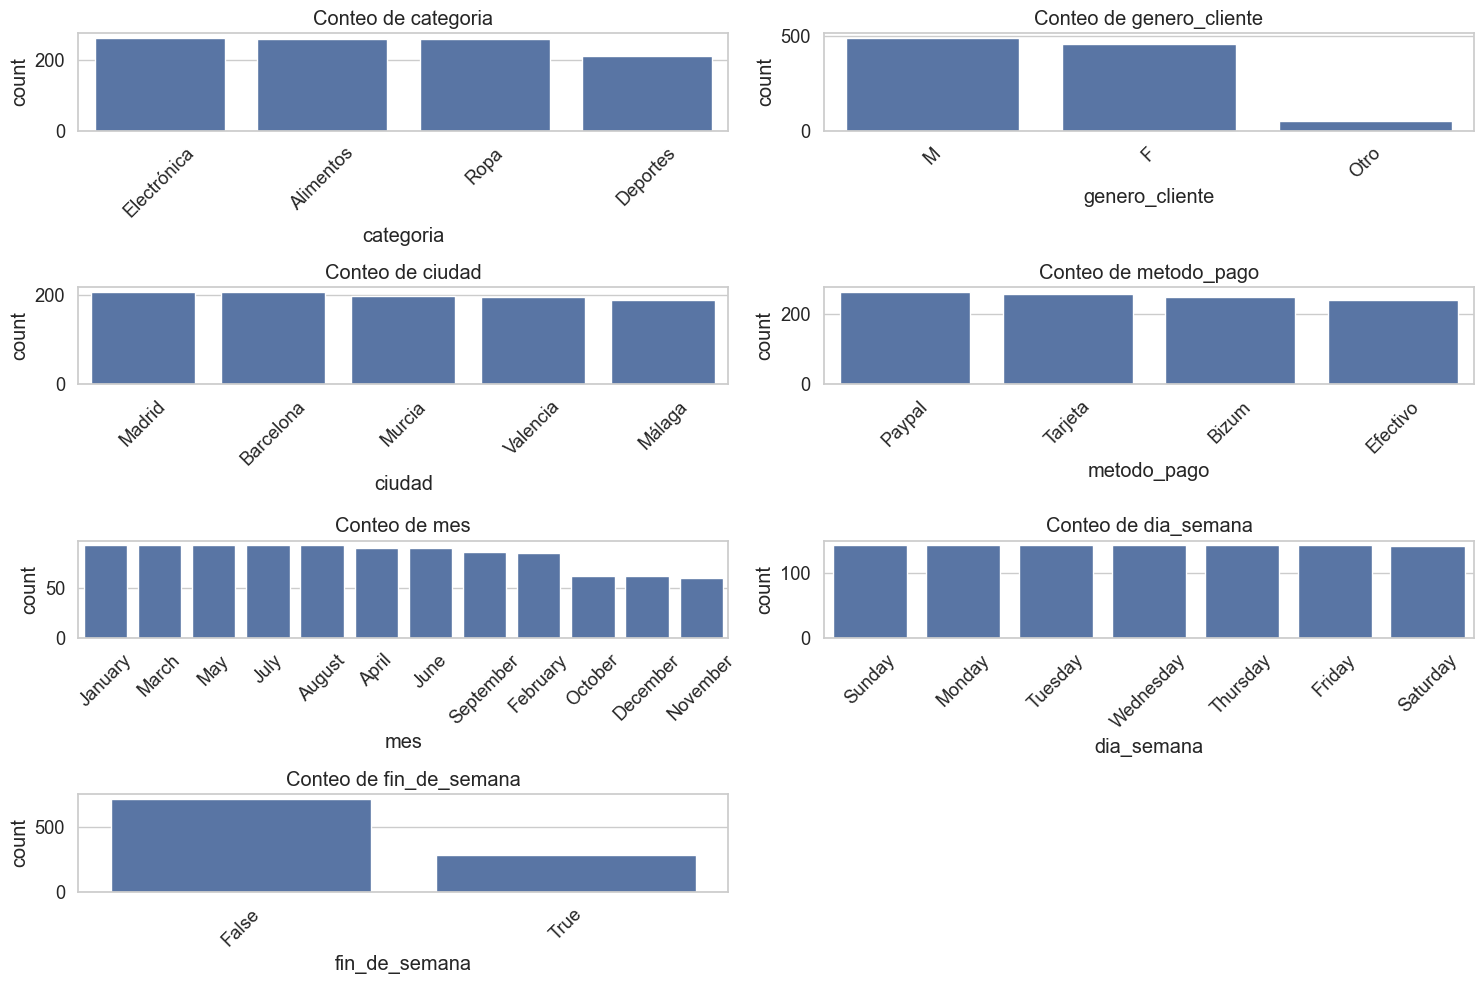

In [17]:
# grafica de conteo para variables categóricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(columnas_categorica, 1):
    order = ventas_df[col].value_counts().index
    plt.subplot(4, 2, i)
    sns.countplot(data=ventas_df, x=col, order=order)
    plt.title(f'Conteo de {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

In [18]:
# tablas de frecuncia para variables categóricas
for col in columnas_categorica:
    print(f'\nTabla de frecuencia de {col}:\n')
    freq = ventas_df[col].value_counts(normalize=True).mul(100).round(2)
    print(f'{freq}\n')



Tabla de frecuencia de categoria:

categoria
Electrónica    26.4
Alimentos      26.1
Ropa           26.1
Deportes       21.4
Name: proportion, dtype: float64


Tabla de frecuencia de genero_cliente:

genero_cliente
M       48.9
F       45.8
Otro     5.3
Name: proportion, dtype: float64


Tabla de frecuencia de ciudad:

ciudad
Madrid       20.8
Barcelona    20.7
Murcia       19.9
Valencia     19.7
Málaga       18.9
Name: proportion, dtype: float64


Tabla de frecuencia de metodo_pago:

metodo_pago
Paypal      26.2
Tarjeta     25.5
Bizum       24.6
Efectivo    23.7
Name: proportion, dtype: float64


Tabla de frecuencia de mes:

mes
January      9.3
March        9.3
May          9.3
July         9.3
August       9.3
April        9.0
June         9.0
September    8.6
February     8.5
October      6.2
December     6.2
November     6.0
Name: proportion, dtype: float64


Tabla de frecuencia de dia_semana:

dia_semana
Sunday       14.3
Monday       14.3
Tuesday      14.3
Wednesday    14.3
Thu

<function matplotlib.pyplot.show(close=None, block=None)>

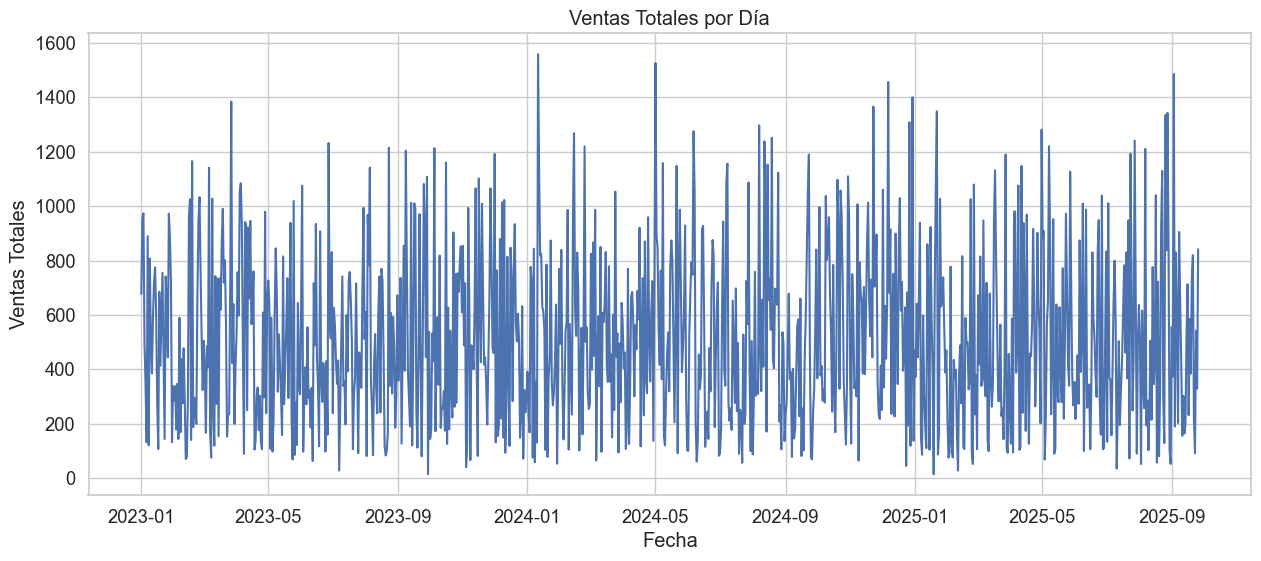

In [19]:
# Tendencias temporales
plt.figure(figsize=(15, 6))
ventas_por_dia = ventas_df.groupby('fecha')['total_ventas'].sum().reset_index() 
plt.plot(ventas_por_dia['fecha'], ventas_por_dia['total_ventas'])
plt.title('Ventas Totales por Día')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.show

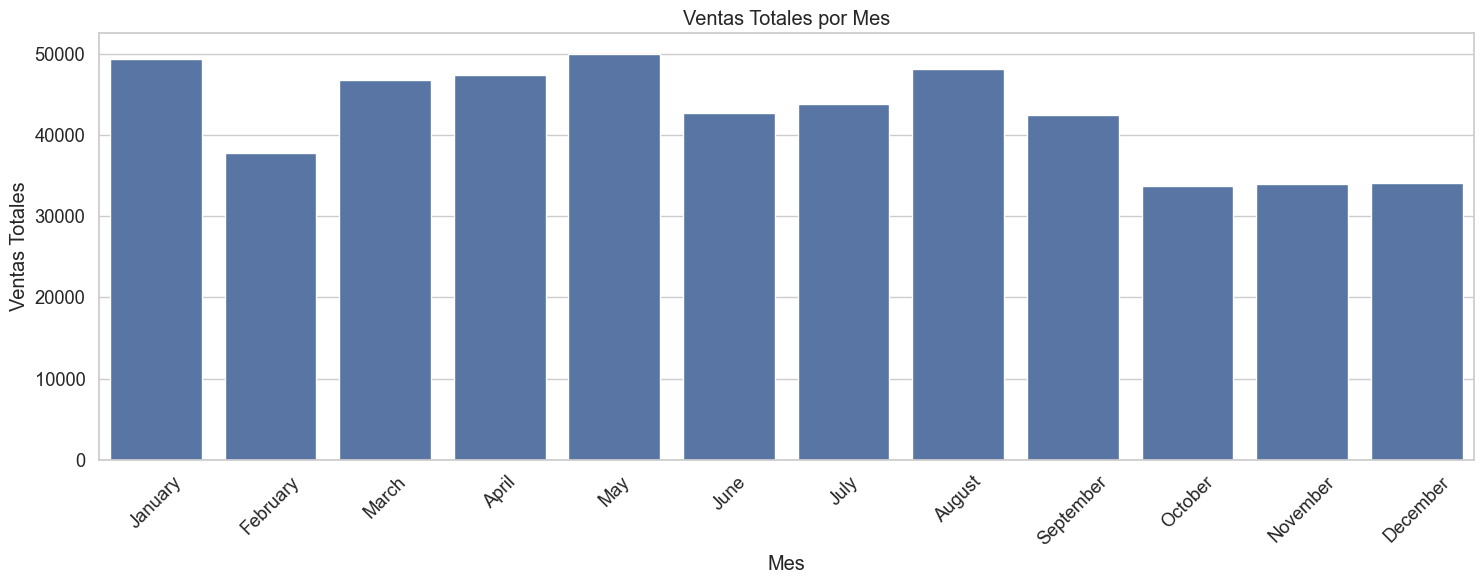

In [23]:
# ventas por mes
plt.figure(figsize=(15, 6))
ventas_por_mes = ventas_df.groupby('mes')['total_ventas'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

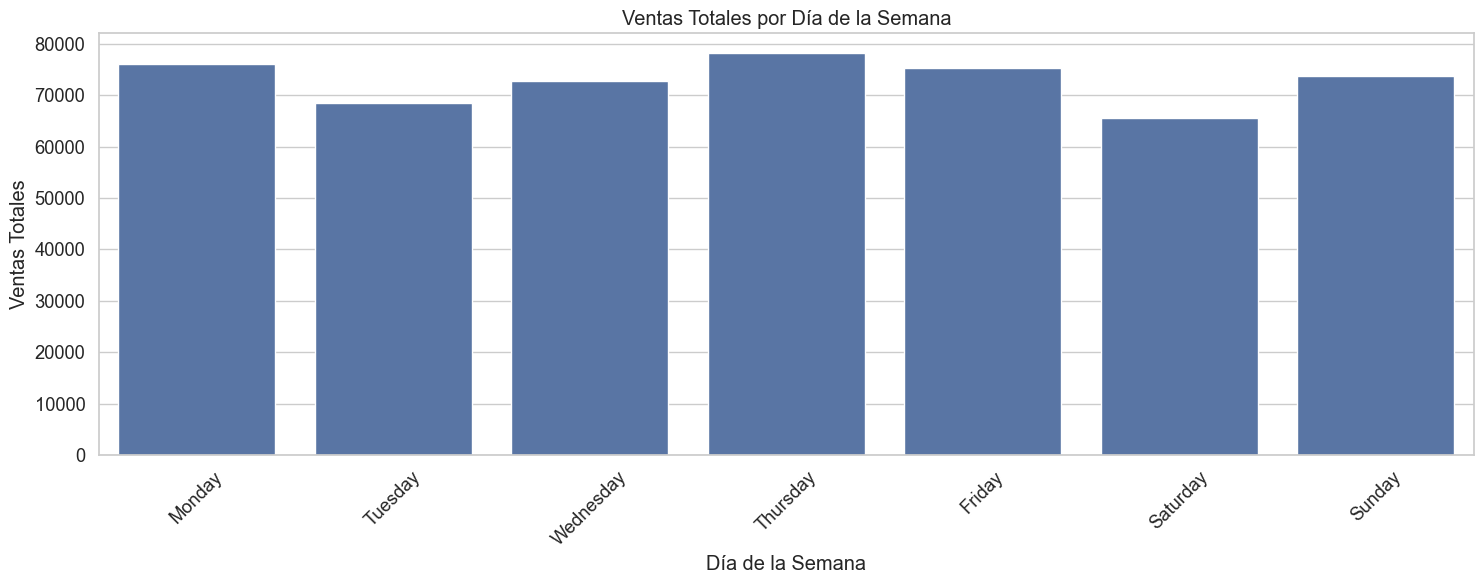

In [24]:
#ventas por dia de la semana
plt.figure(figsize=(15, 6))
ventas_por_dia_semana = ventas_df.groupby('dia_semana')['total_ventas'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
sns.barplot(x=ventas_por_dia_semana.index, y=ventas_por_dia_semana.values)
plt.title('Ventas Totales por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ANÁLISIS BIVARIANTE

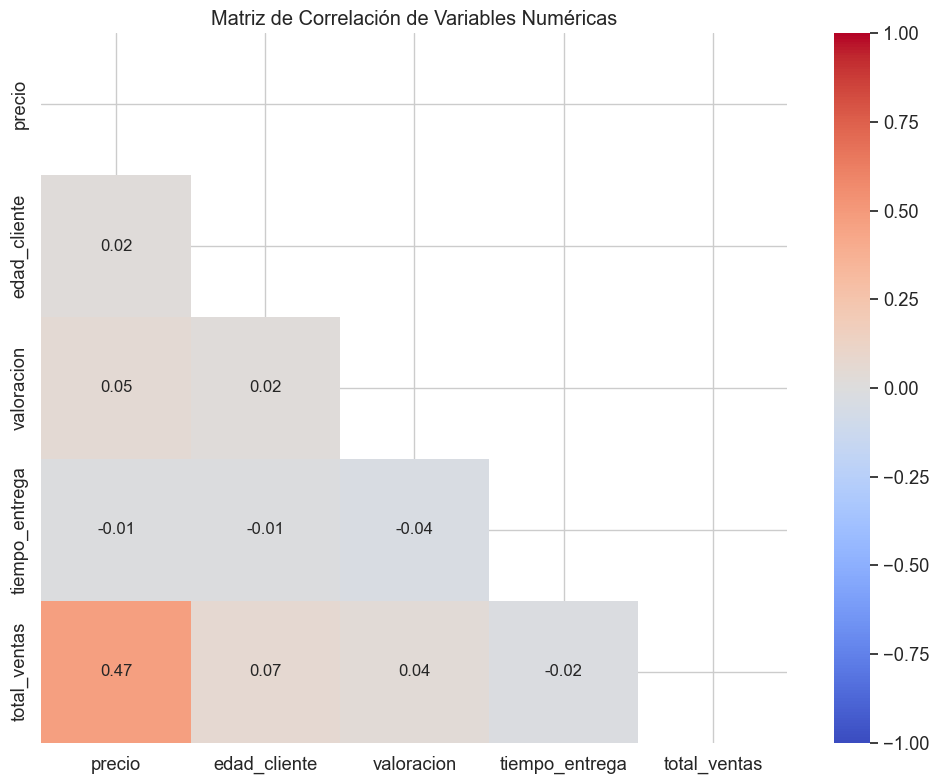

In [26]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
corr_mat = ventas_df[columnas_numerica].corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool)) # crear una mascara para la parte superior
sns.heatmap(corr_mat, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, center=0,)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.tight_layout()
plt.show()

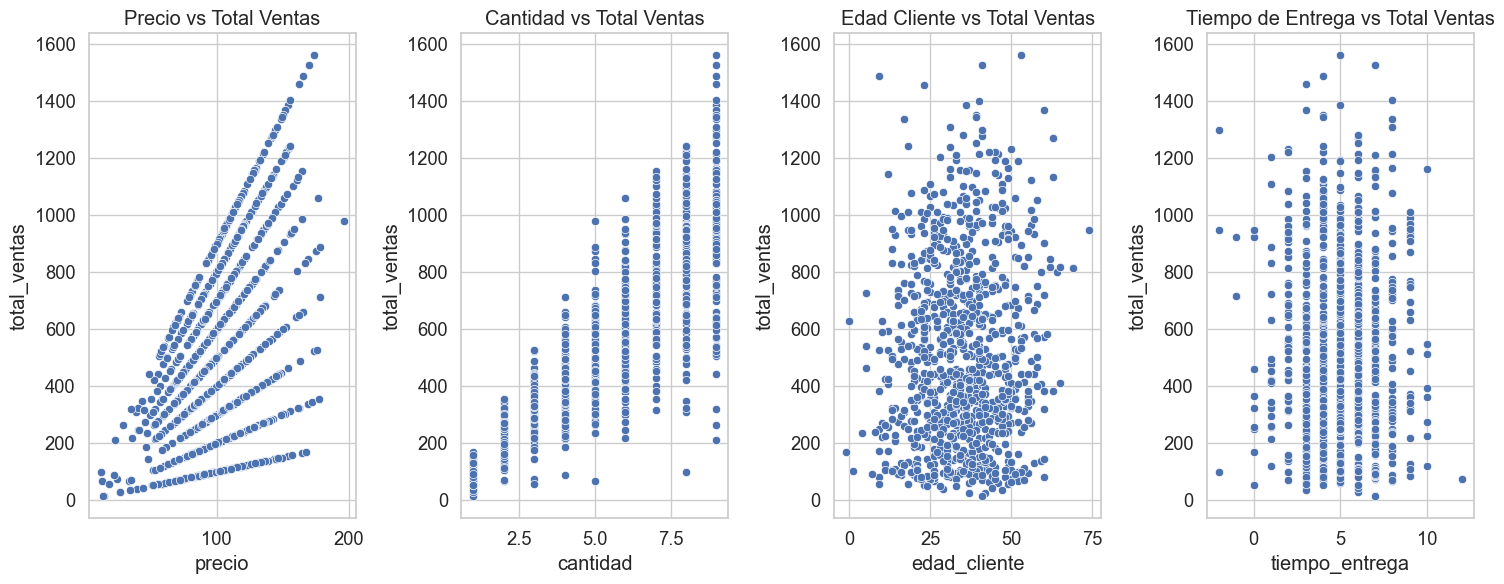

In [31]:
#  scatterplot para variavles con correlacion alta
plt.figure(figsize=(15, 6))
plt.subplot(1, 4, 1)
sns.scatterplot(data=ventas_df, x='precio', y='total_ventas')
plt.title('Precio vs Total Ventas')

plt.subplot(1, 4, 2)
sns.scatterplot(data=ventas_df, x='cantidad', y='total_ventas')
plt.title('Cantidad vs Total Ventas')

plt.subplot(1, 4, 3)
sns.scatterplot(data=ventas_df, x='edad_cliente', y='total_ventas')
plt.title('Edad Cliente vs Total Ventas')

plt.subplot(1, 4, 4)
sns.scatterplot(data=ventas_df, x='tiempo_entrega', y='total_ventas')
plt.title('Tiempo de Entrega vs Total Ventas')    

plt.tight_layout()
plt.show()

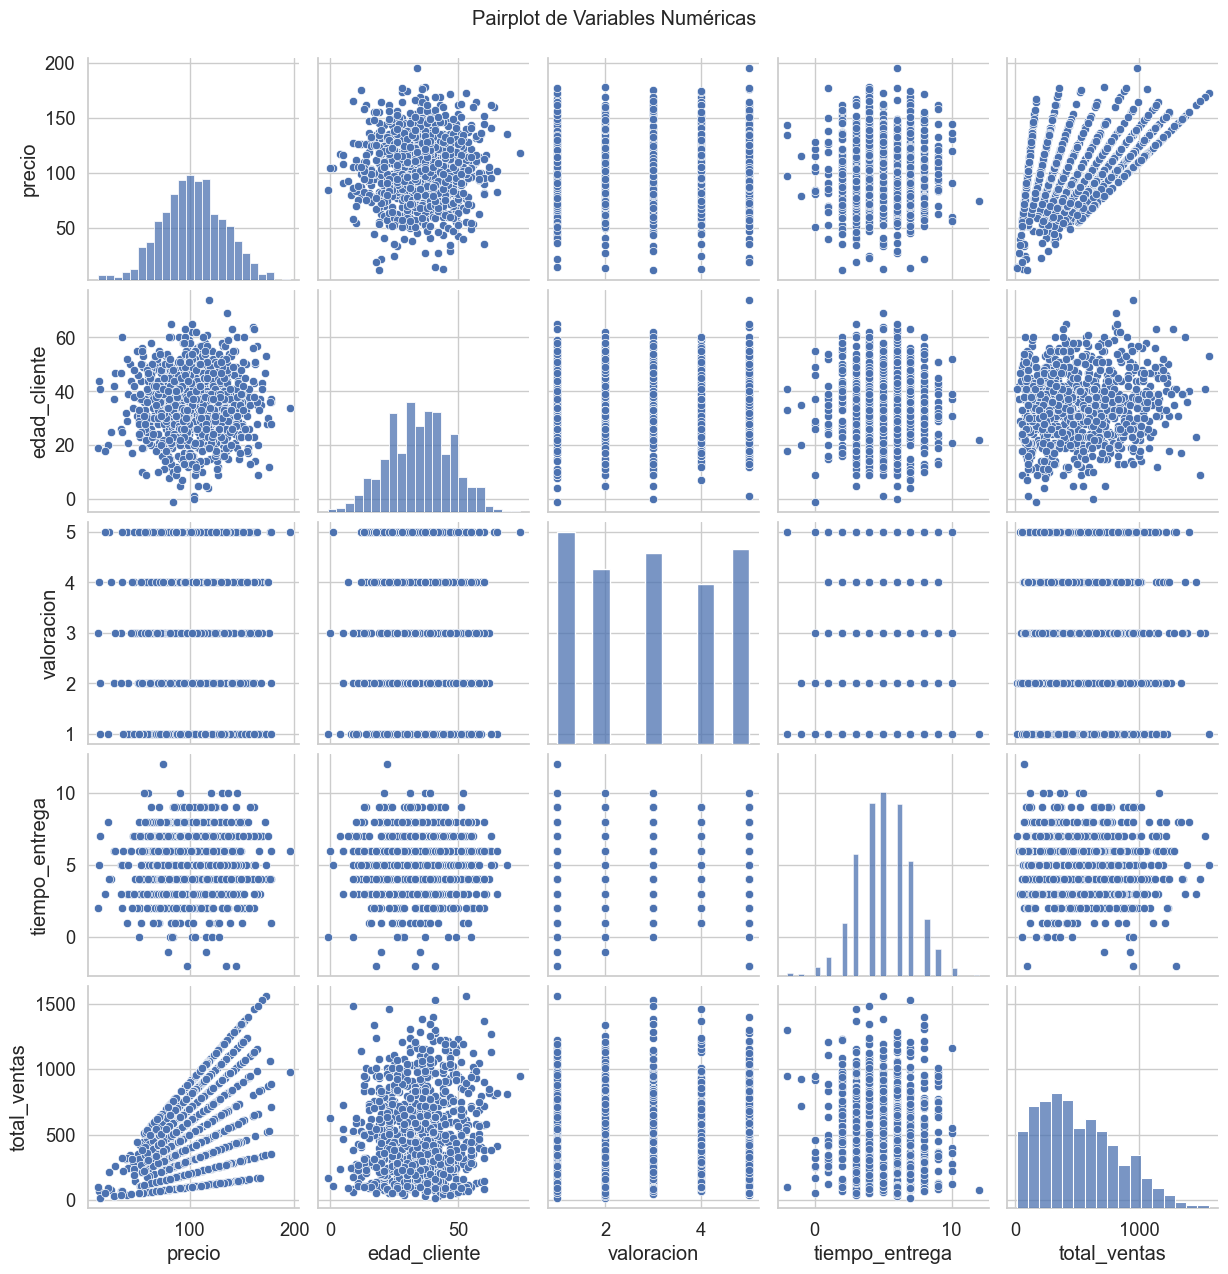

In [33]:
# pairplot para variables numéricas
sns.pairplot(ventas_df[columnas_numerica], height=2.5)
plt.suptitle('Pairplot de Variables Numéricas', y=1.02)
plt.show()


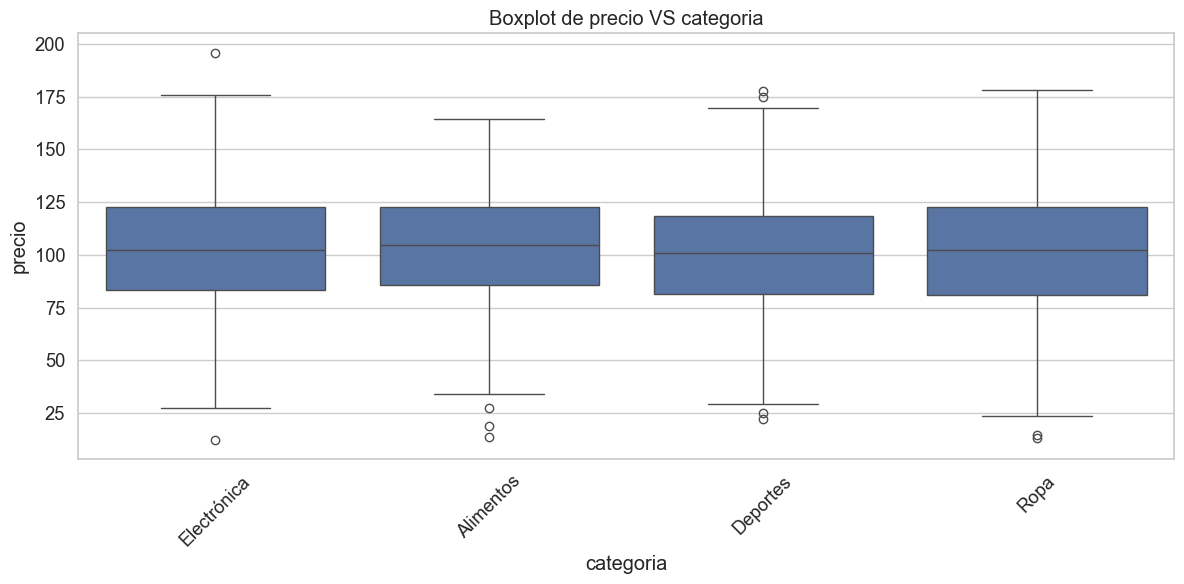

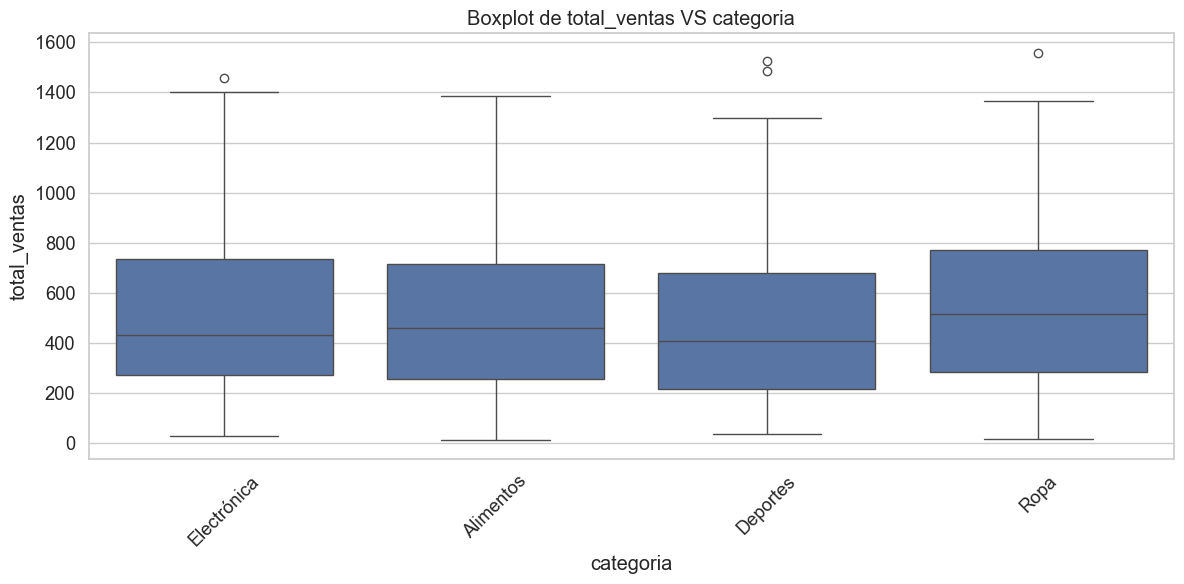

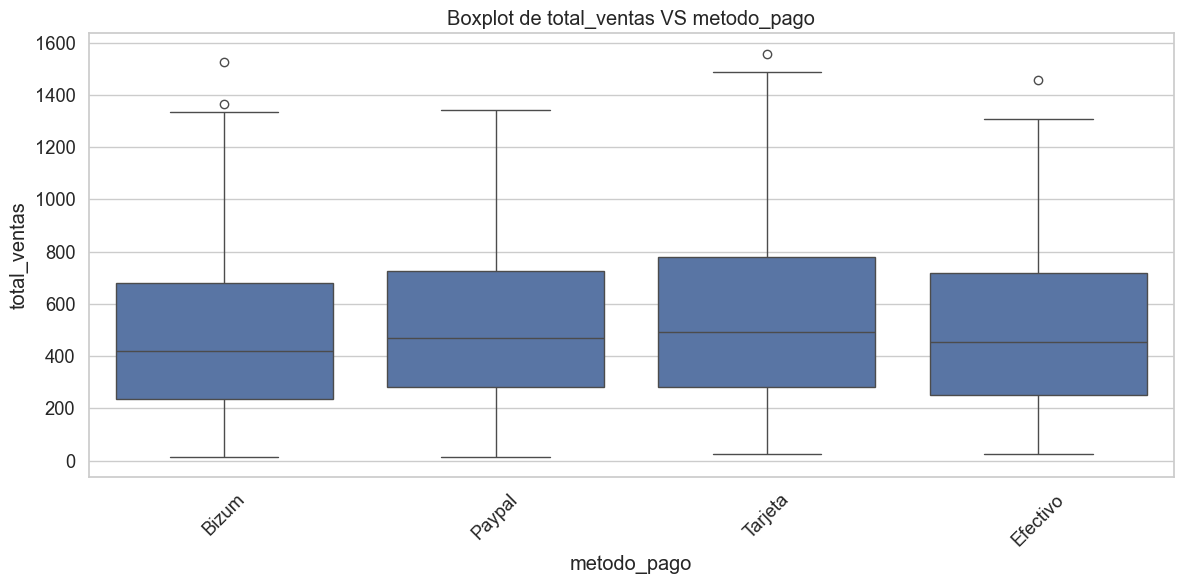

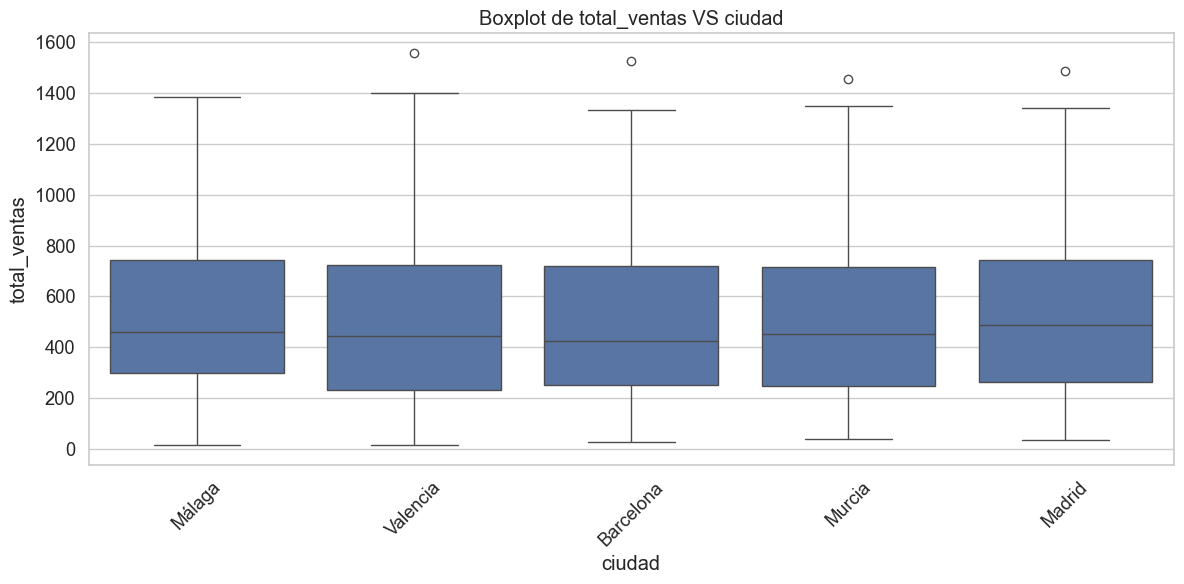

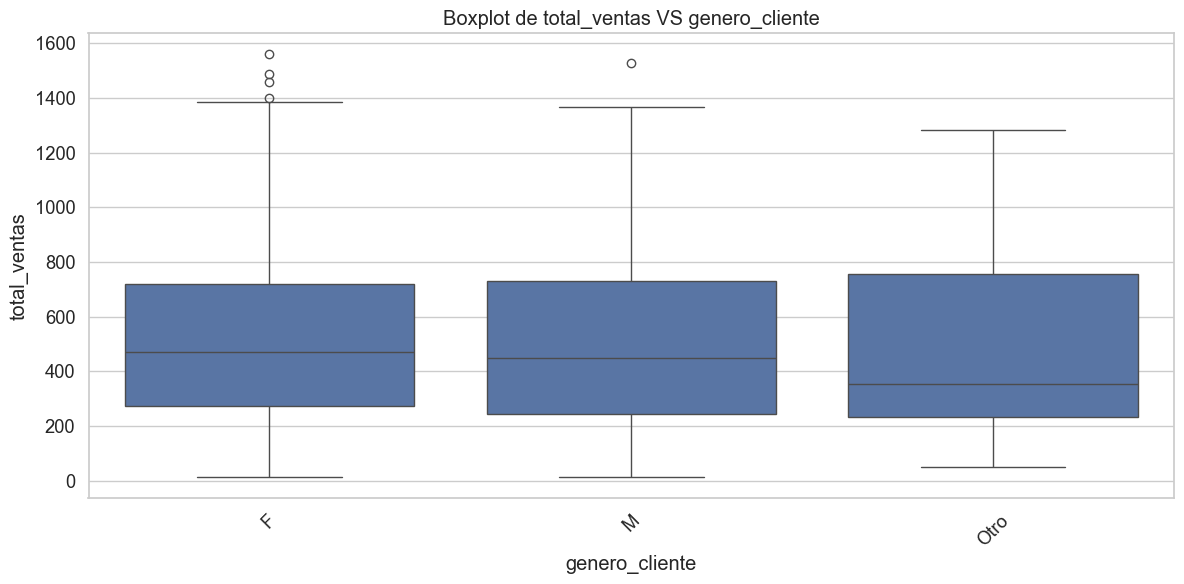

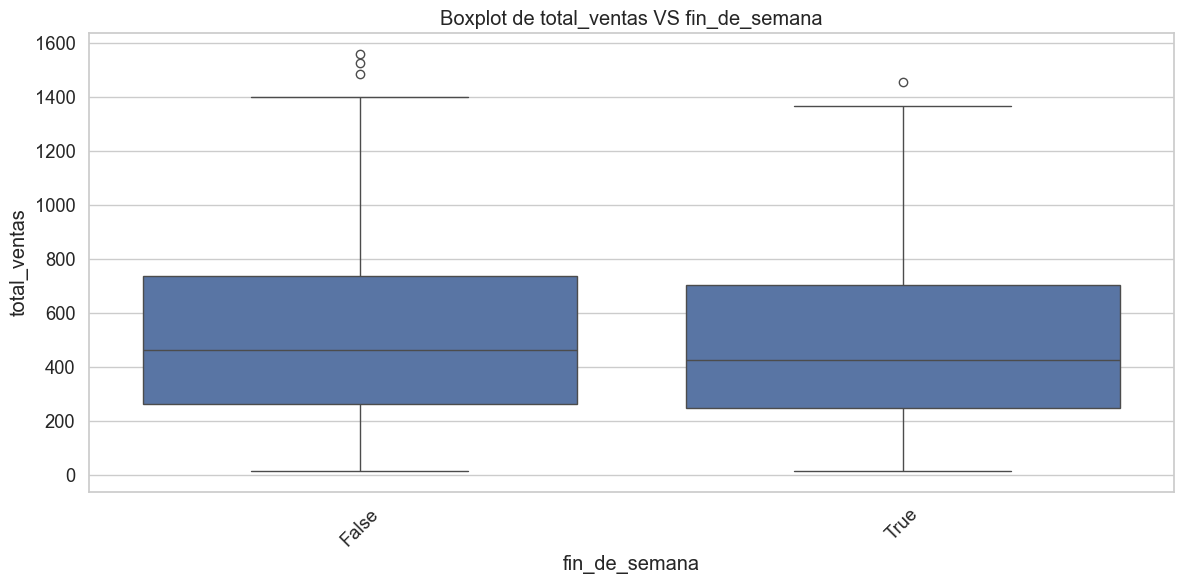

In [42]:
# boxplot de viables numericas agrupadas por categoria
cat_num_pairs= [
    ('categoria', 'precio'),
    ('categoria', 'total_ventas'),
    ('metodo_pago', 'total_ventas'),
    ('ciudad', 'total_ventas'),
    ('genero_cliente', 'total_ventas'),
    ('fin_de_semana', 'total_ventas'),
]

for cat_col, num_col in cat_num_pairs:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=ventas_df, x=cat_col, y=num_col)
    plt.title(f'Boxplot de {num_col} VS {cat_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


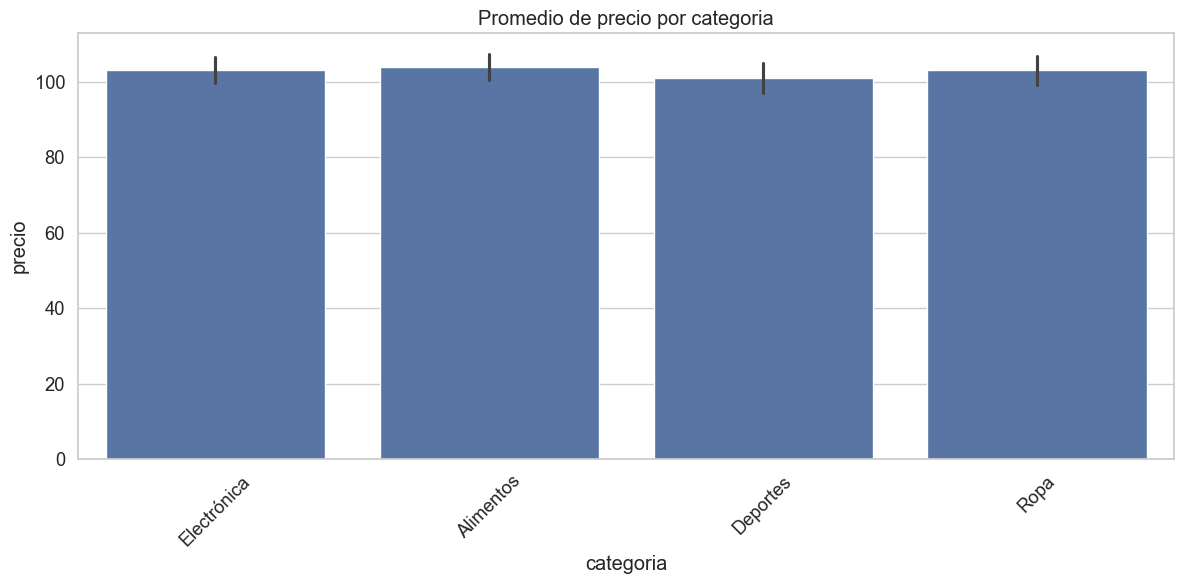

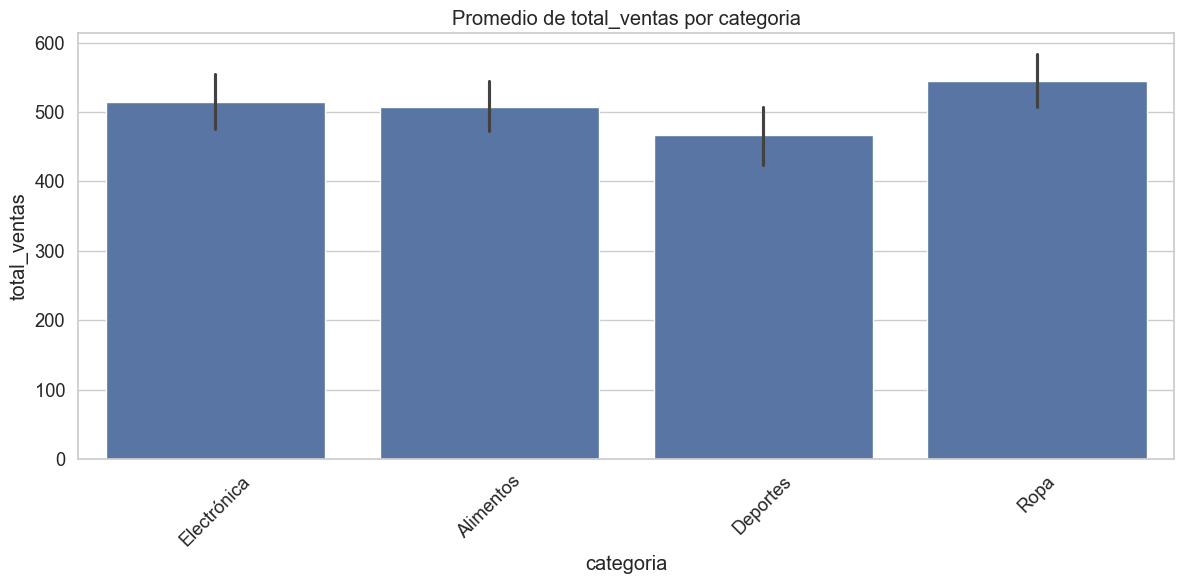

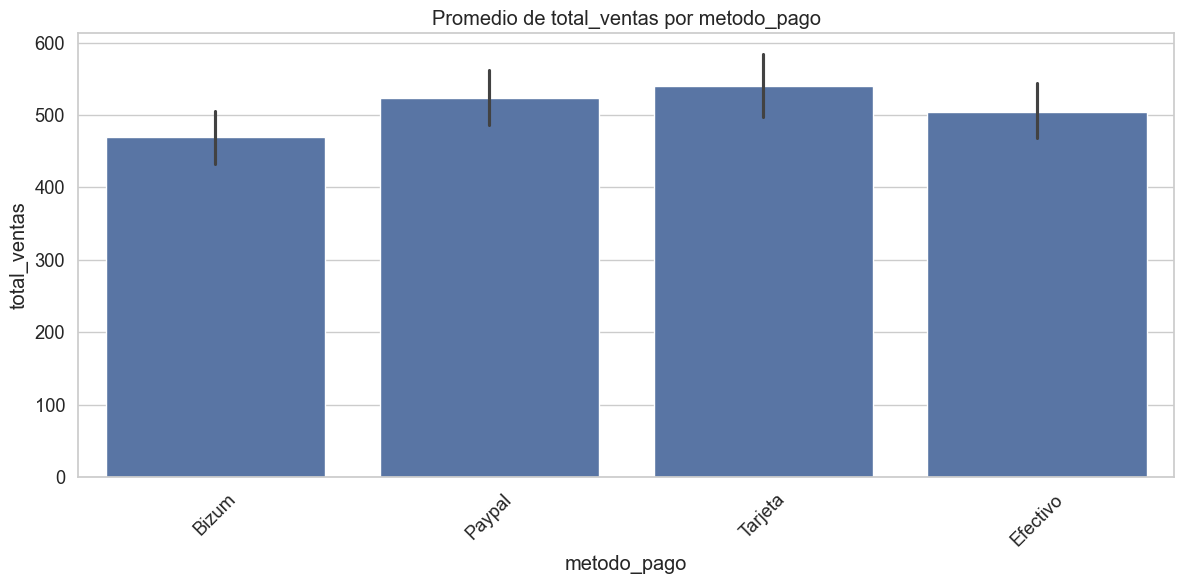

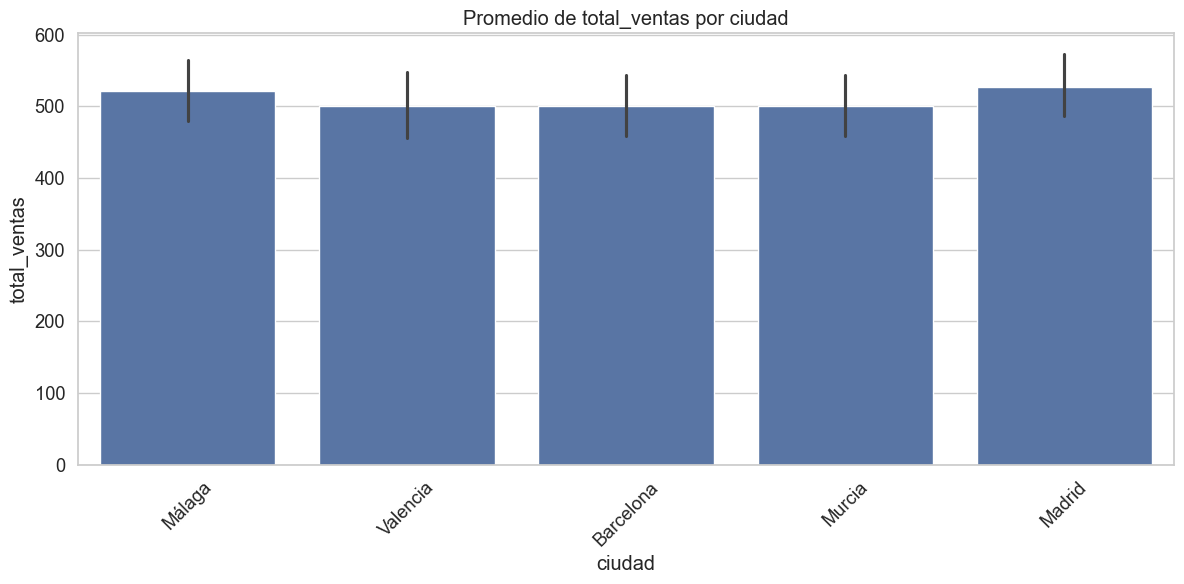

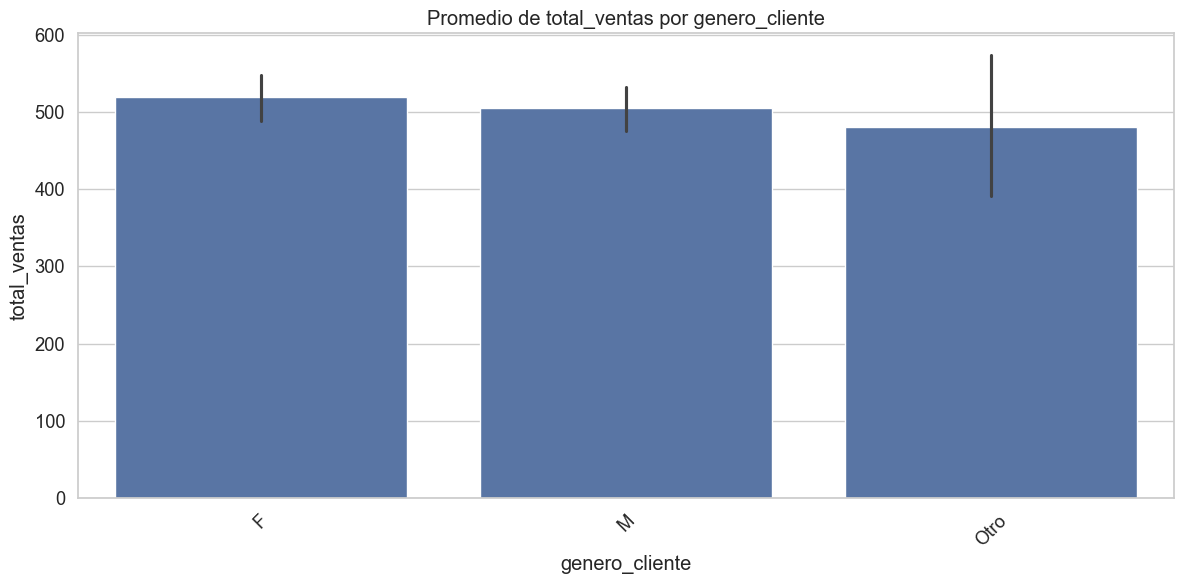

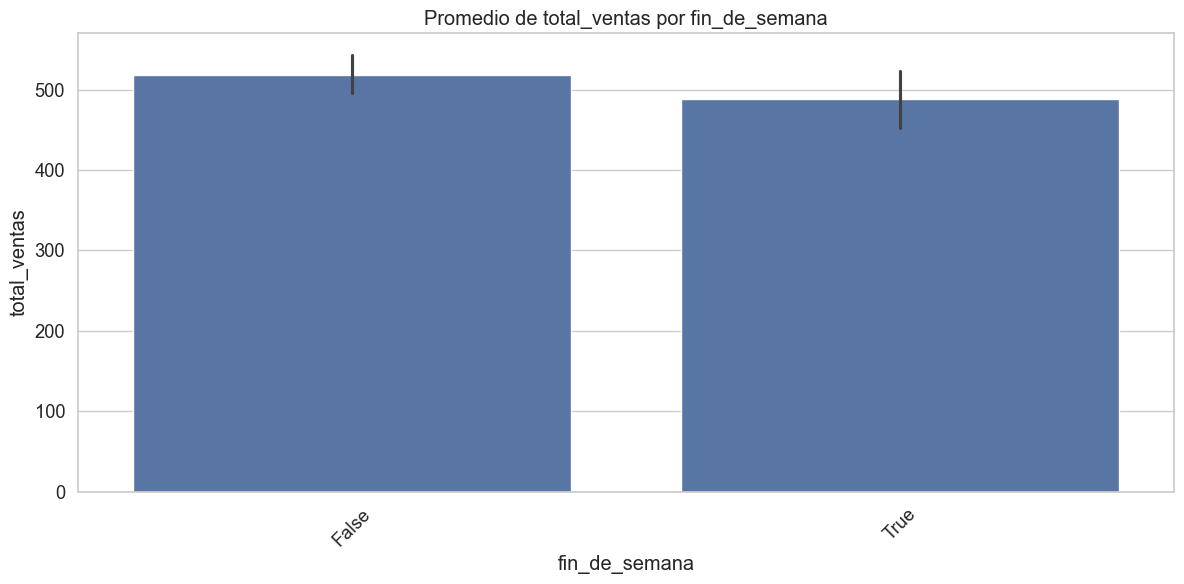

In [37]:
# barplot para promedios por categoria
for cat_col, num_col in cat_num_pairs:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=ventas_df, x=cat_col, y=num_col, estimator=np.mean)
    plt.title(f'Promedio de {num_col} por {cat_col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Tabla de Contingencia de categoria y metodo_pago:

metodo_pago  Bizum  Efectivo  Paypal  Tarjeta
categoria                                    
Alimentos    24.90     22.22   26.05    26.82
Deportes     23.83     21.96   28.04    26.17
Electrónica  26.14     23.86   25.76    24.24
Ropa         23.37     26.44   25.29    24.90


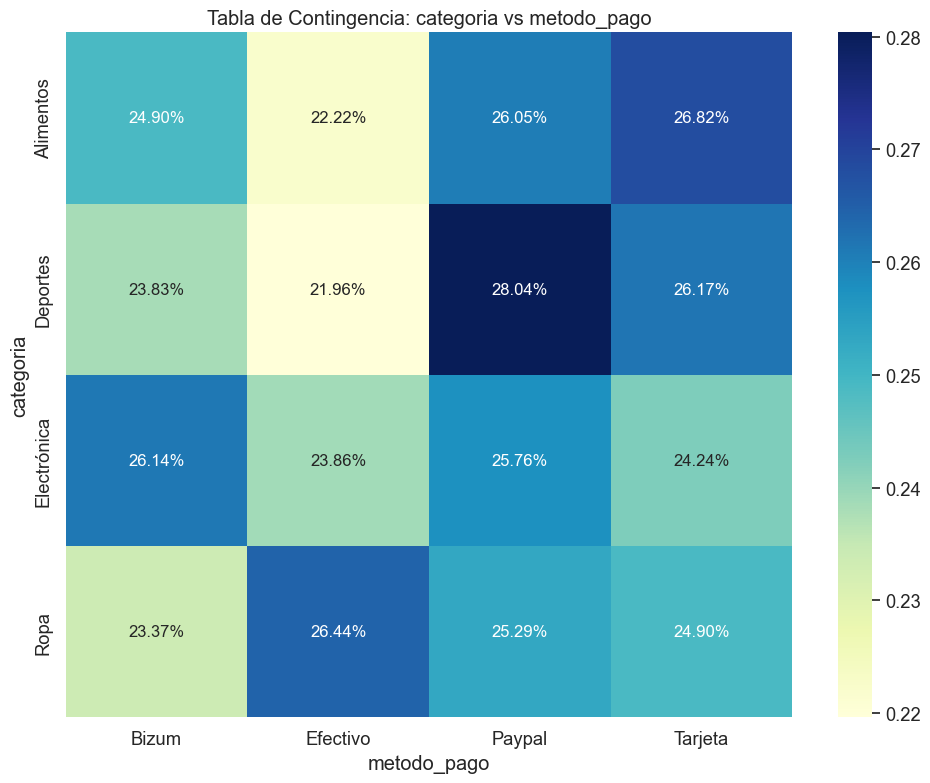


Tabla de Contingencia de categoria y ciudad:

ciudad       Barcelona  Madrid  Murcia  Málaga  Valencia
categoria                                               
Alimentos        17.24   20.31   18.01   22.99     21.46
Deportes         21.03   22.90   18.22   17.29     20.56
Electrónica      21.59   25.00   20.83   15.91     16.67
Ropa             22.99   15.33   22.22   19.16     20.31


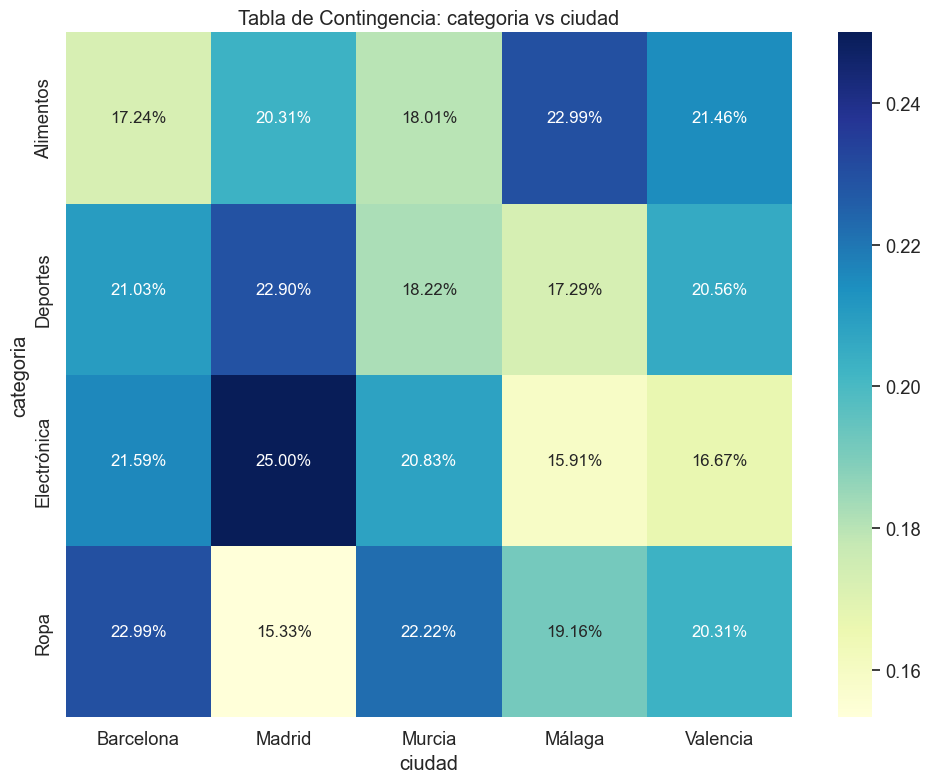


Tabla de Contingencia de genero_cliente y metodo_pago:

metodo_pago     Bizum  Efectivo  Paypal  Tarjeta
genero_cliente                                  
F               24.02     21.18   26.42    28.38
M               24.74     26.79   25.15    23.31
Otro            28.30     16.98   33.96    20.75


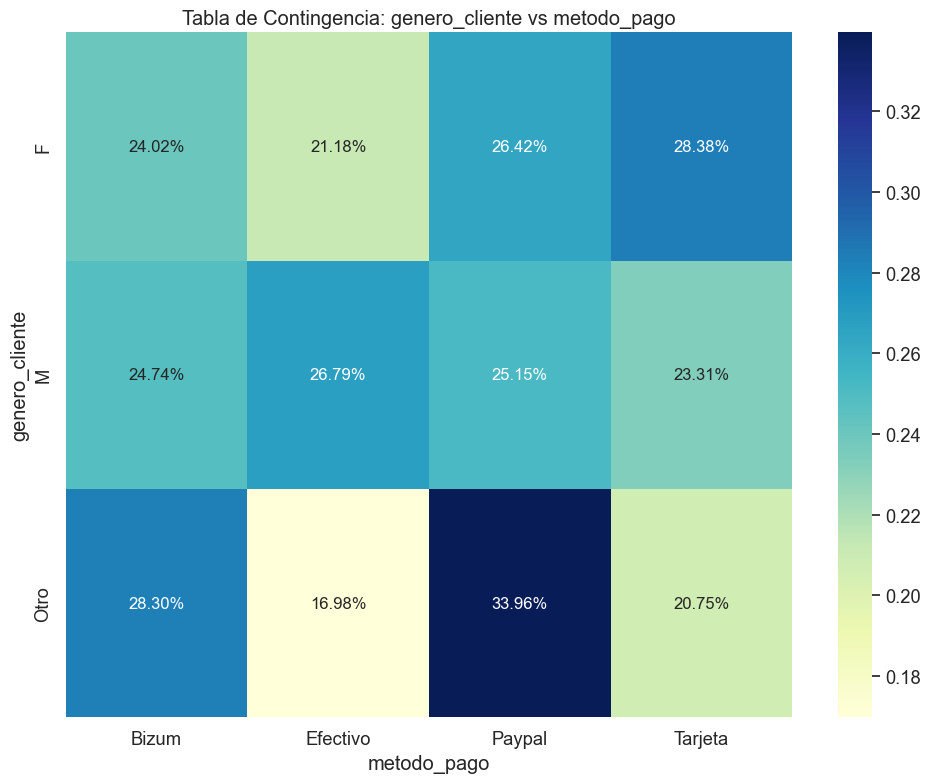


Tabla de Contingencia de fin_de_semana y metodo_pago:

metodo_pago    Bizum  Efectivo  Paypal  Tarjeta
fin_de_semana                                  
False          24.06     22.52   27.41    26.01
True           25.96     26.67   23.16    24.21


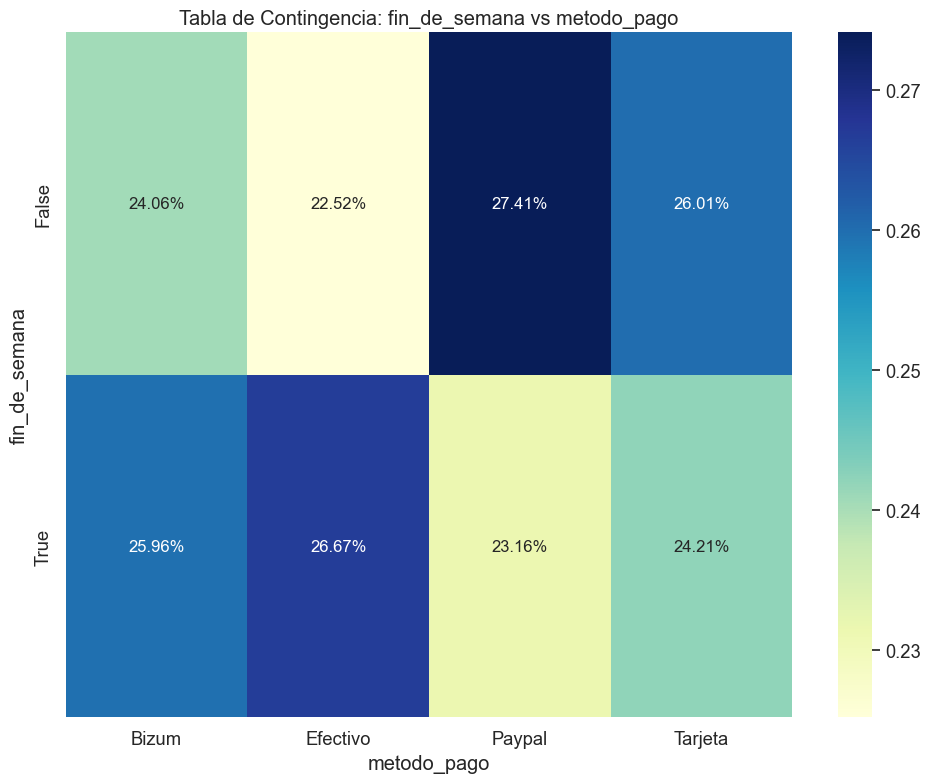

In [41]:
# tabla de contingencia y mapa de calor
cat_col_pairs = [
    ('categoria', 'metodo_pago'),
    ('categoria', 'ciudad'),
    ('genero_cliente', 'metodo_pago'),
    ('fin_de_semana', 'metodo_pago'),
]

for cat1_col, cat2_col in cat_col_pairs:
    #tabla de contingencia
    contingency_table = pd.crosstab(ventas_df[cat1_col], ventas_df[cat2_col], normalize='index')
    print(f'\nTabla de Contingencia de {cat1_col} y {cat2_col}:\n')
    print((contingency_table * 100).round(2)) 
    #mapa de calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(contingency_table, annot=True, fmt='.2%', cmap='YlGnBu')
    plt.title(f'Tabla de Contingencia: {cat1_col} vs {cat2_col}')
    plt.xlabel(cat2_col)
    plt.ylabel(cat1_col)
    plt.tight_layout()
    plt.show()

ANÁLISIS MULTIVARIANTE

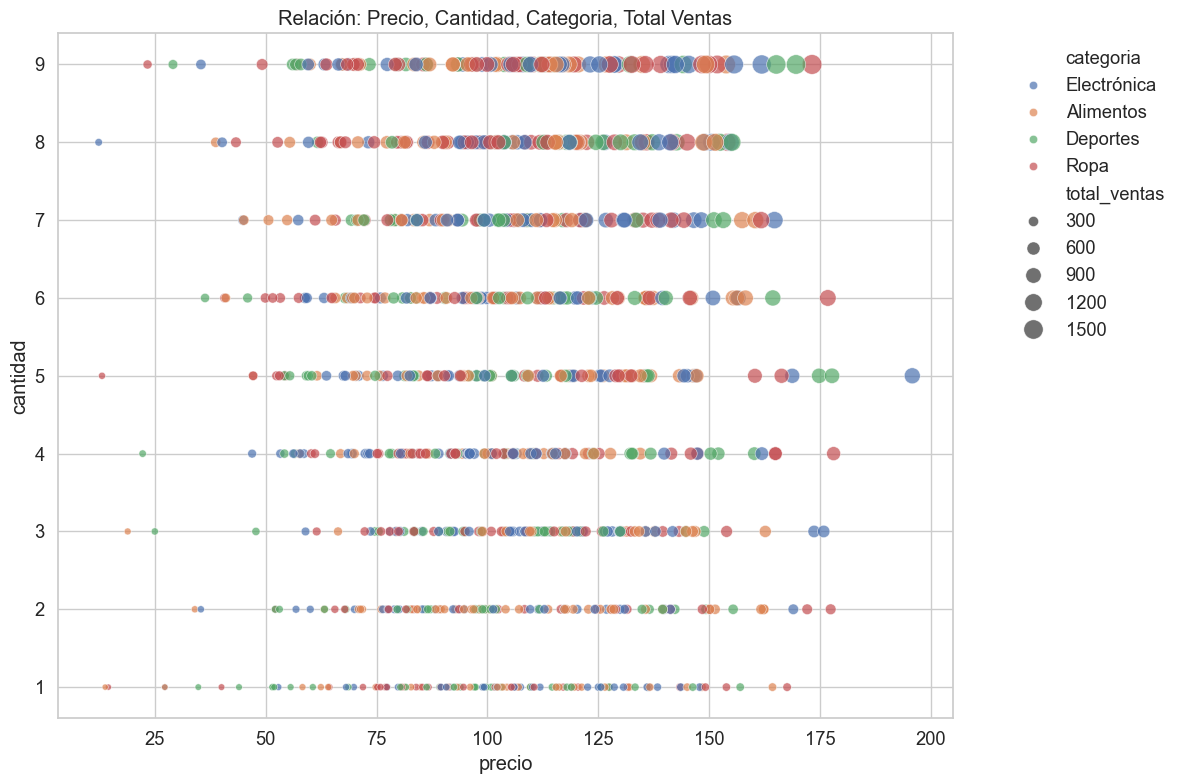

In [43]:
#scatter plot para variables categóricas
plt.figure(figsize=(12, 8))
sns.scatterplot(data=ventas_df, x='precio', y='cantidad', 
                hue='categoria', size='total_ventas', sizes=(20, 200), alpha=0.7)
plt.title('Relación: Precio, Cantidad, Categoria, Total Ventas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


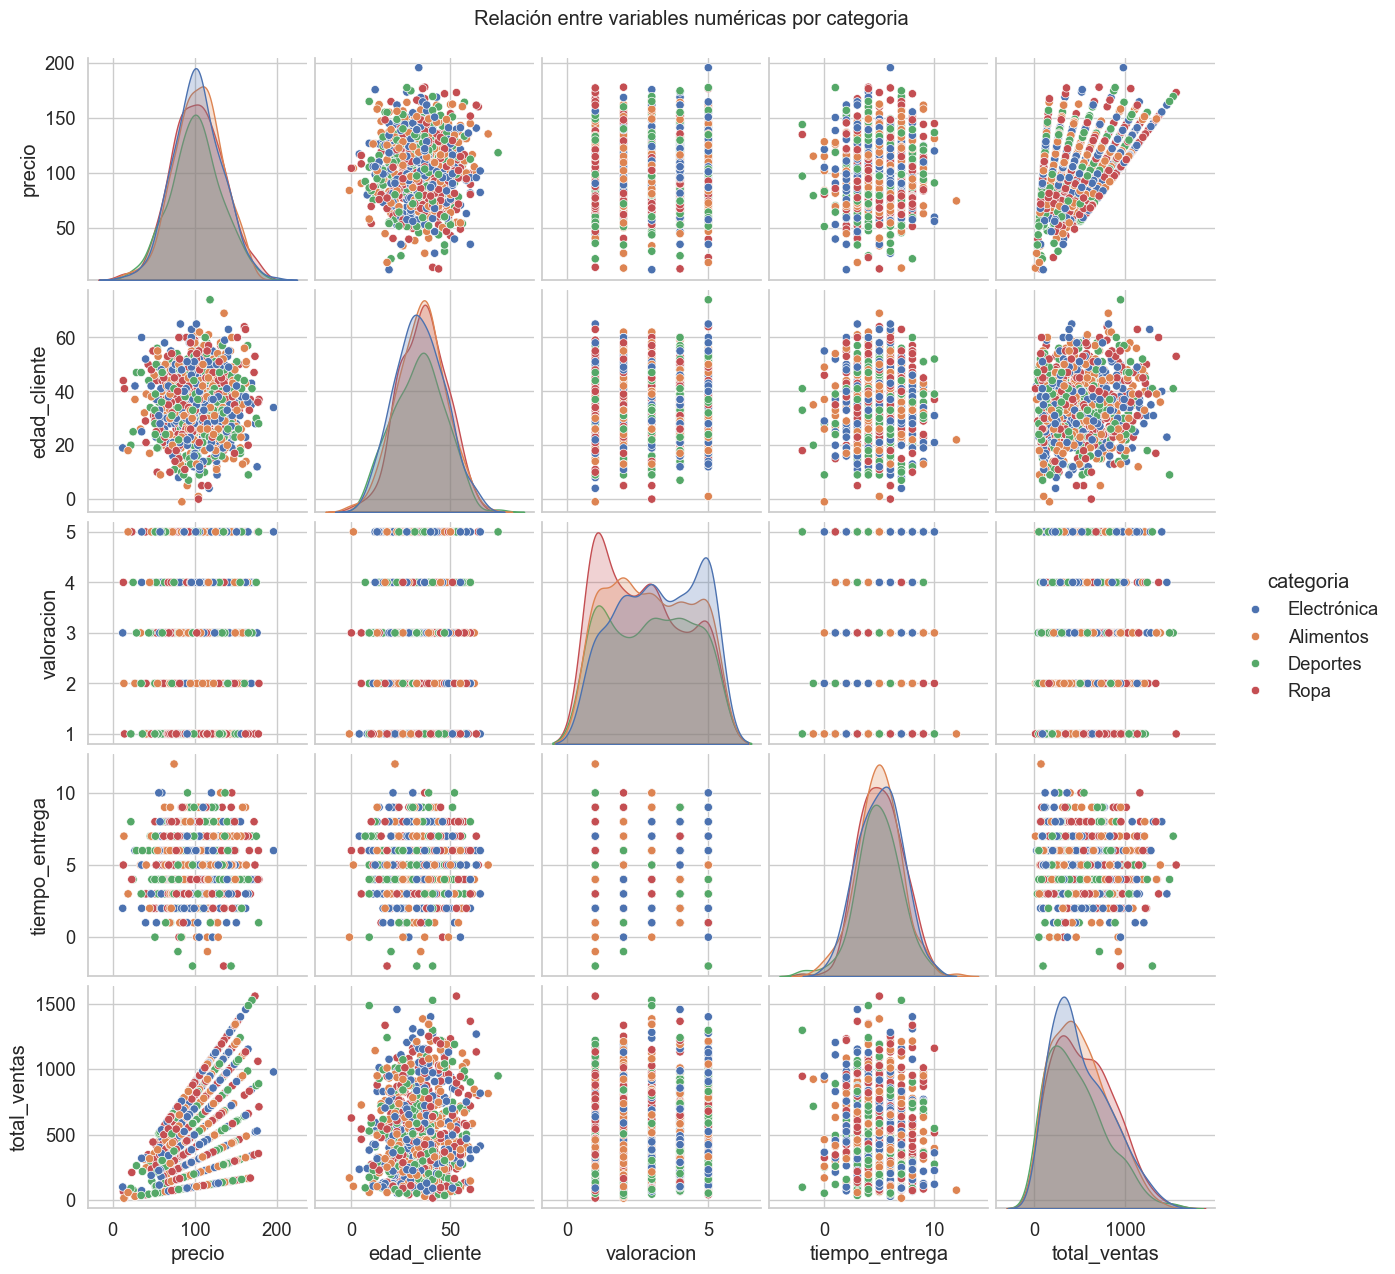

In [44]:
# pares de plot con hue
sns.pairplot(ventas_df[columnas_numerica +['categoria']], hue='categoria', height=2.5)
plt.suptitle('Relación entre variables numéricas por categoria', y=1.02)
plt.show()


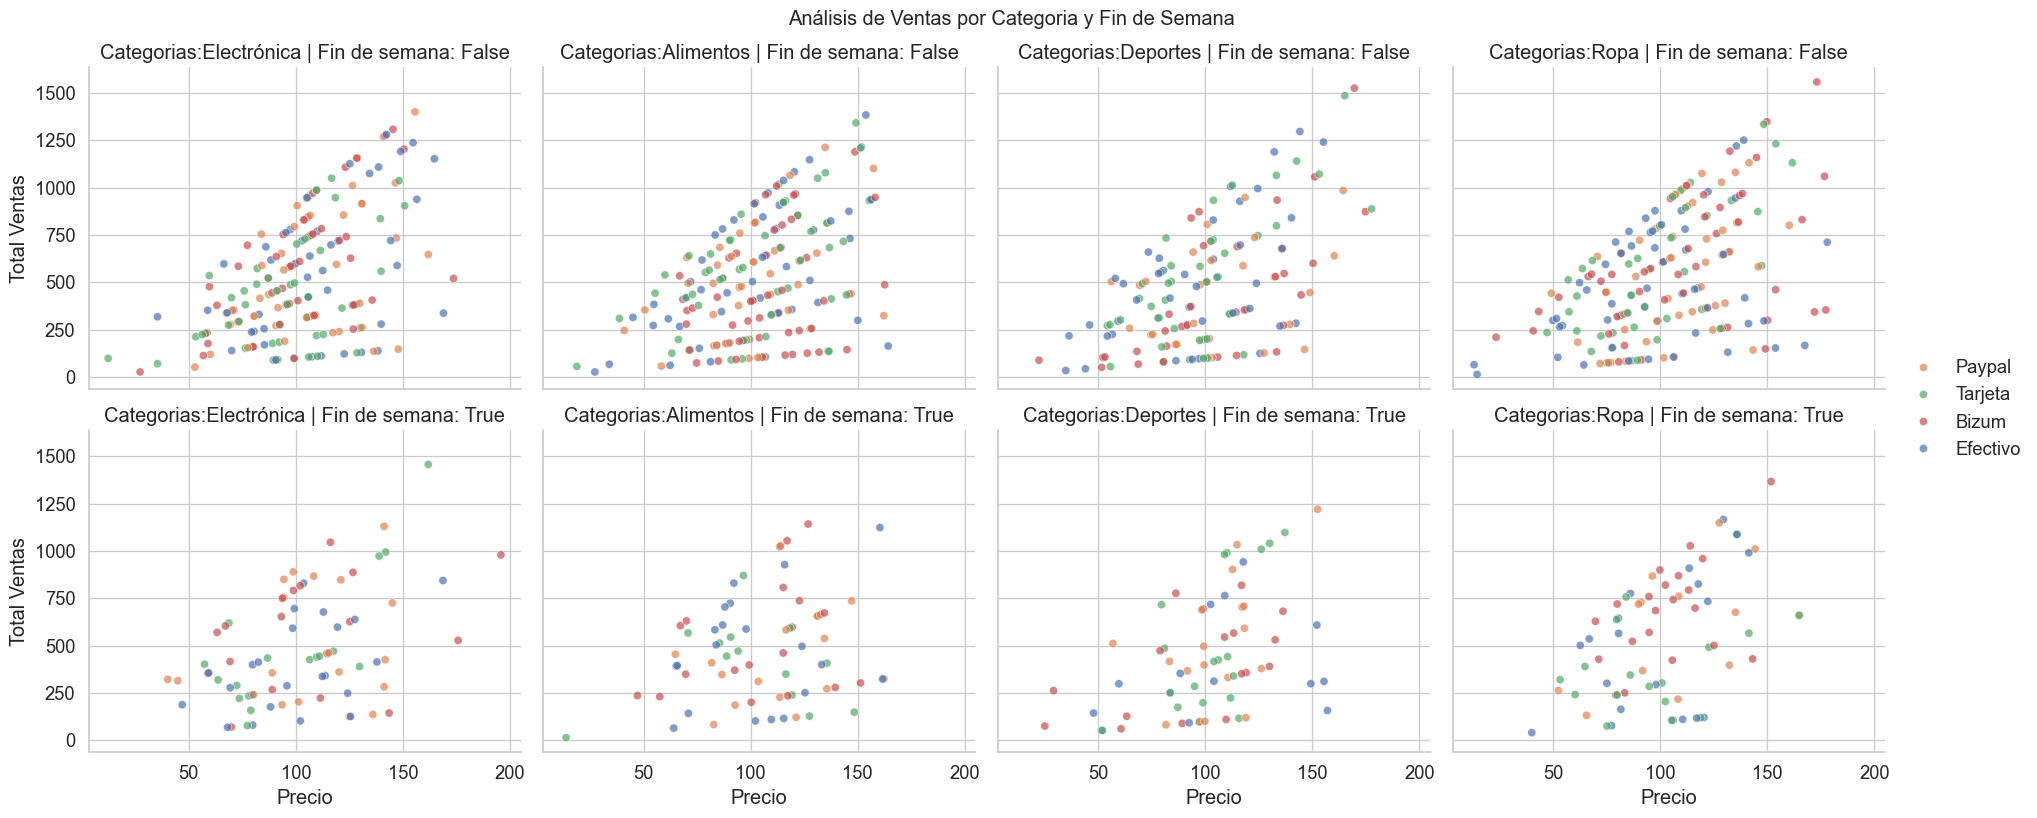

In [47]:
#facetgrid para analisis de multiples variables
g = sns.FacetGrid(ventas_df, col='categoria', row='fin_de_semana',height=4,aspect=1.2)
g.map_dataframe(sns.scatterplot, x='precio', y='total_ventas', hue='metodo_pago', alpha=0.7)
g.add_legend()
g.set_axis_labels('Precio', 'Total Ventas')
g.set_titles('Categorias:{col_name} | Fin de semana: {row_name}')
plt.suptitle('Análisis de Ventas por Categoria y Fin de Semana', y=1.02)
plt.tight_layout
plt.show()